Red Wine Prediction by SVM (All Features) V3.0.0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
plt.style.use("ggplot")  #using style ggplot
from sklearn.metrics import accuracy_score, confusion_matrix


Load red wine quality Dataset

In [2]:
%matplotlib inline
red_wine = pd.read_csv('../winequality-red.csv', delimiter=';')

Preprocessing Data for performing SVM algorithms

In [3]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5, 8)
group_names = ['0', '1']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


quality
1    855
0    744
Name: count, dtype: int64


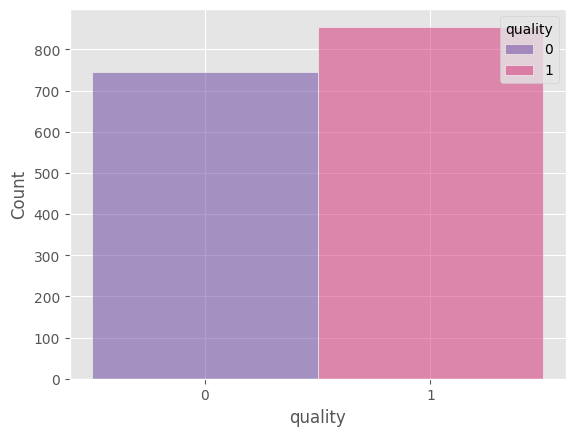

In [5]:
sns.histplot(data=red_wine, x="quality",hue='quality',palette=['#663f9e',"#d42875"])
counts = red_wine['quality'].value_counts()

# Print the value counts
print(counts)

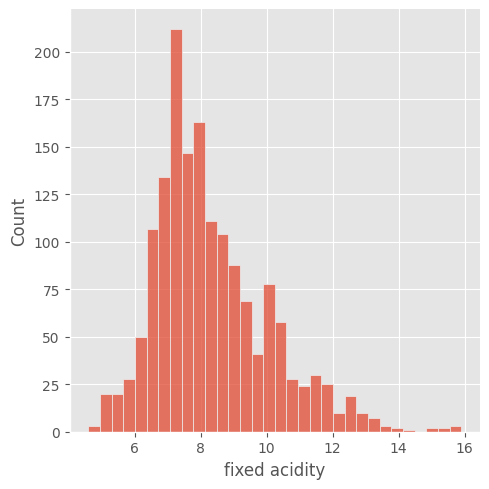

In [6]:
sns.displot(red_wine['fixed acidity'])

DETECT & DEAL WITH OUTLIERS 

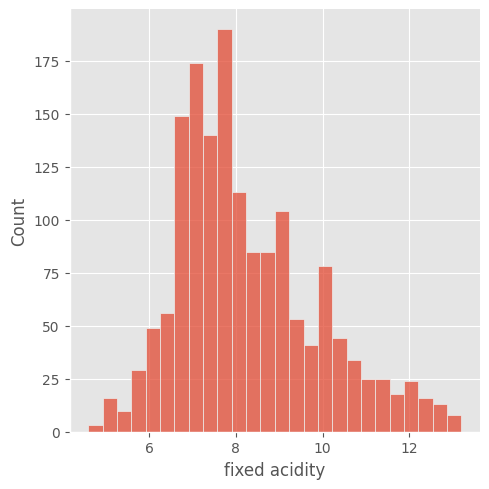

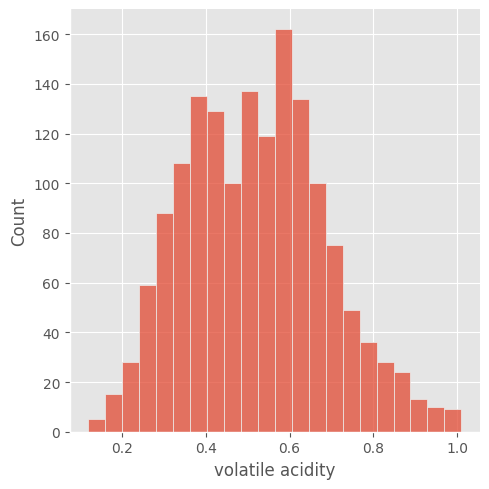

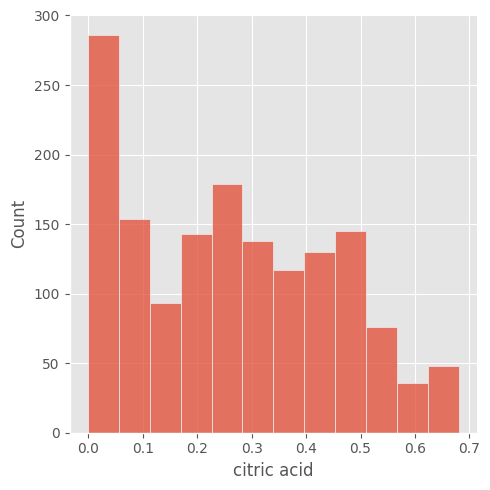

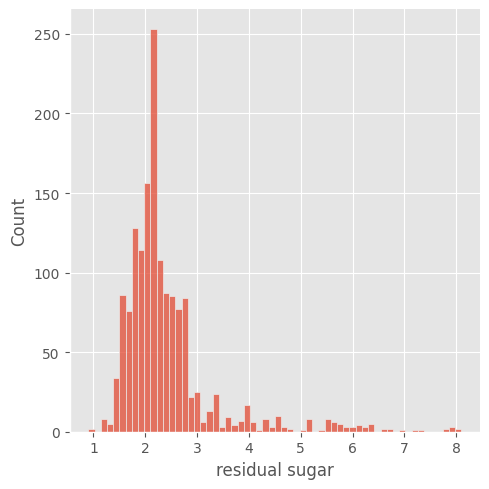

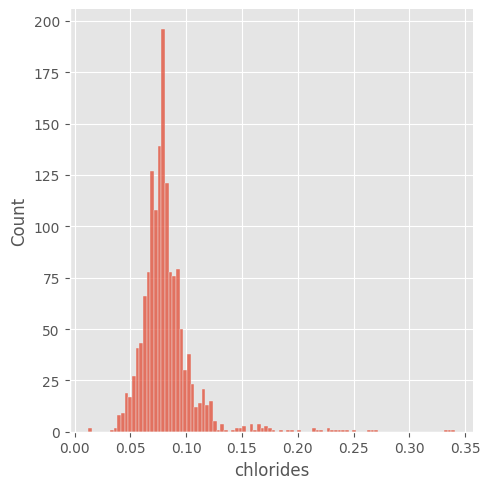

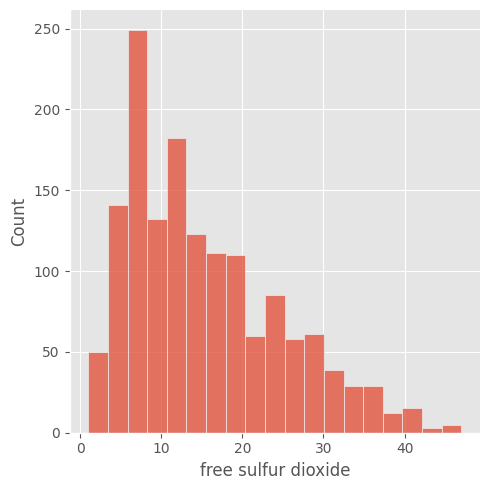

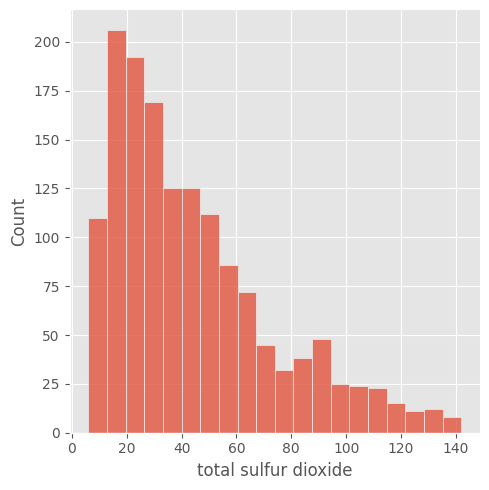

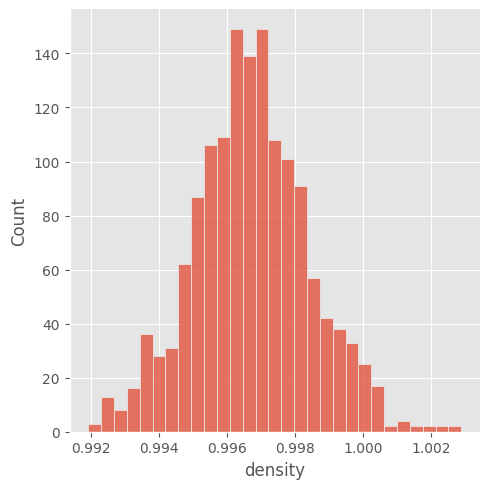

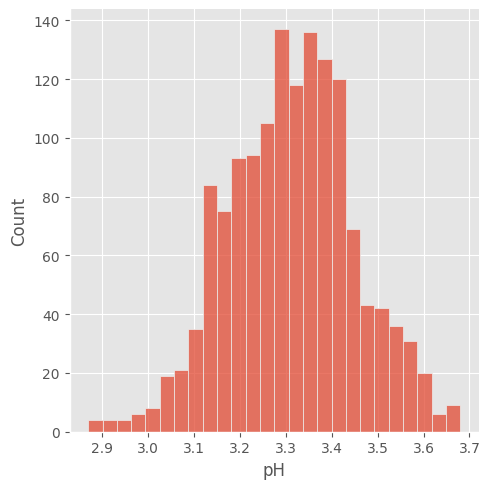

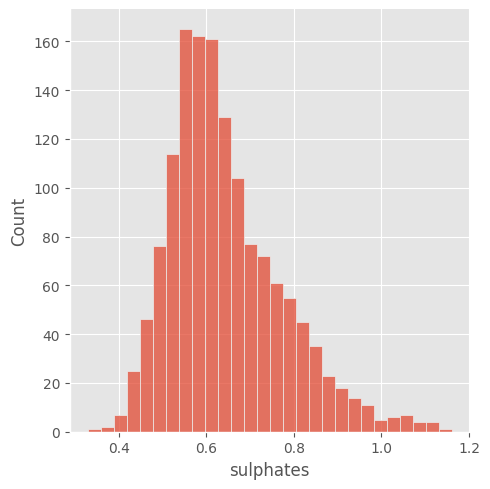

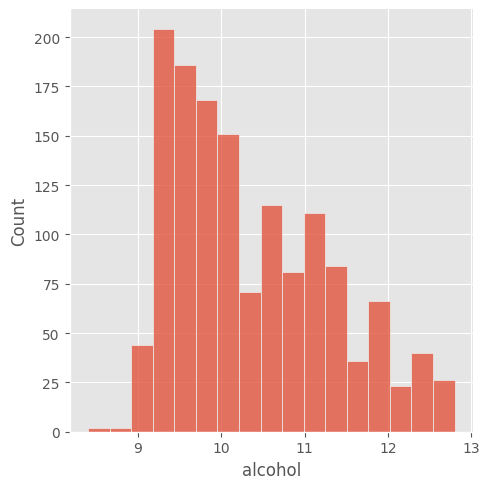

In [7]:
#deal with fixed acidity outliers
q = red_wine['fixed acidity'].quantile(0.99)
red_wine = red_wine[red_wine['fixed acidity'] < q]
sns.displot(red_wine['fixed acidity'])

#deal with volatile acidity outliers
q = red_wine['volatile acidity'].quantile(0.99)
red_wine = red_wine[red_wine['volatile acidity'] < q]
sns.displot(red_wine['volatile acidity'])

#deal with citric acid outliers
q = red_wine['citric acid'].quantile(0.99)
red_wine = red_wine[red_wine['citric acid'] < q]
sns.displot(red_wine['citric acid'])

#deal with residual sugar outliers
q = red_wine['residual sugar'].quantile(0.99)
red_wine = red_wine[red_wine['residual sugar'] < q]
sns.displot(red_wine['residual sugar'])

#deal with chlorides outliers
q = red_wine['chlorides'].quantile(0.99)
red_wine = red_wine[red_wine['chlorides'] < q]
sns.displot(red_wine['chlorides'])

#deal with free sulfur dioxide outliers
q = red_wine['free sulfur dioxide'].quantile(0.99)
red_wine = red_wine[red_wine['free sulfur dioxide'] < q]
sns.displot(red_wine['free sulfur dioxide'])

#deal with total sulfur dioxide outliers
q = red_wine['total sulfur dioxide'].quantile(0.99)
red_wine = red_wine[red_wine['total sulfur dioxide'] < q]
sns.displot(red_wine['total sulfur dioxide'])

#deal with density outliers
q = red_wine['density'].quantile(0.01)
red_wine = red_wine[red_wine['density'] > q]
sns.displot(red_wine['density'])

#deal with pH outliers
q = red_wine['pH'].quantile(0.99)
red_wine = red_wine[red_wine['pH'] < q]
sns.displot(red_wine['pH'])

#deal with sulphates outliers
q = red_wine['sulphates'].quantile(0.99)
red_wine = red_wine[red_wine['sulphates'] < q]
sns.displot(red_wine['sulphates'])

#deal with alcohol outliers
q = red_wine['alcohol'].quantile(0.99)
red_wine = red_wine[red_wine['alcohol'] < q]
sns.displot(red_wine['alcohol'])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'quality') should not be included in variables
#Categorical variables may or maynot be added if any
variables = red_wine[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

#Using 10 as the minimum vif values i.e any independent variable 10 and above will have to be dropped
#From the results all independent variable are below 10

,VIF,features
0,2.035942e+06,const
1,7.300577e+00,fixed acidity
2,1.959264e+00,volatile acidity
3,3.109611e+00,citric acid
4,1.607245e+00,residual sugar
5,1.146531e+00,chlorides
6,2.053044e+00,free sulfur dioxide
7,2.366855e+00,total sulfur dioxide
8,5.774604e+00,density
9,3.001377e+00,pH


In [9]:
#convert data type to numeric
red_wine = red_wine.astype('float64')
red_wine['quality'] = red_wine['quality'].astype('int64')

data_X = red_wine.drop('quality', axis=1)
data_y = red_wine['quality']

print(data_X.shape)
print(data_y.shape)

(1410, 11)
(1410,)


In [10]:
def train_test_split(X,y,test_size):
    test_size = test_size
    train_size = 1 - float(test_size)
    total_rows = red_wine.shape[0]
    split =  int(total_rows * (train_size))
    X_train = data_X[0:split]
    X_test = data_X[split:]
    y_train = data_y[0:split]
    y_test = data_y[split:]
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

In [12]:
print("X train:",len(X_train))
print("X test:",len(X_test))
print("y train:",len(y_train))
print("y test:",len(y_test))

X train: 1128
X test: 282
y train: 1128
y test: 282


In [13]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [14]:
data_y_counts = y_train.value_counts()
data_y_counts

quality
 1    609
-1    519
Name: count, dtype: int64

In [15]:
data_y_counts = y_test.value_counts()
data_y_counts

quality
 1    144
-1    138
Name: count, dtype: int64

TRAINING SVM MODEL

In [16]:
class SVM:
    def __init__(self, learning_rate, lambda_param, n_iterations):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 1000

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

In [17]:
svm_model = SVM(learning_rate=0.01,lambda_param=0.0001,n_iterations=1000)
svm_model.fit(X_train.to_numpy(), y_train.to_numpy())

In [18]:
svm_y_pred = svm_model.predict(X_test.to_numpy())
accuracy = accuracy_score(svm_y_pred, y_test)
print('Accuracy Score:', float(accuracy*100),"%")

Accuracy Score: 71.27659574468085 %


Predict using the trained SVM model

In [19]:
# Predict using the trained SVM model
# Map predicted labels back to original labels
svm_y_pred_mapped = np.where(svm_y_pred == 1, "GOOD", "BAD")  
# Assuming 1 is mapped to good, and -1 is mapped to bad

# Print the predicted quality
print("Predicted quality of red wine:" ,svm_y_pred_mapped)
print(len(svm_y_pred_mapped))

Predicted quality of red wine: ['GOOD' 'GOOD' 'BAD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD' 'BAD' 'BAD' 'BAD' 'GOOD' 'BAD' 'BAD'
 'GOOD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'GOOD' 'BAD' 'BAD' 'BAD' 'GOOD' 'GOOD' 'GOOD' 'BAD' 'GOOD' 'GOOD'
 'BAD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'GOOD' 'GOOD' 'GOOD' 'BAD' 'GOOD' 'BAD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD'
 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD' 'GOOD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'GOOD' 'GOOD' 'BAD' 'BAD' 'GOOD' 'BAD' 'GOOD' 'GOOD' 'BAD'
 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD'
 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD' 'GOOD' 'BAD' 'BAD' 'GOOD' 'GOOD' 'GOOD'
 'GOOD' 'BAD' 'BAD' 'GOOD' 'BAD' 'BAD' 'GOOD' 'BAD' 'GOOD' 'GOOD' 'BAD'
 'BAD' 'GOOD' 'GOOD' 'BAD' 'BAD' 'BAD' 'BAD' 'GOOD' 'GOOD' 'GOOD' 'GOOD'
 'BAD' 'GOOD' 'GO

Calculate the hinge loss for the test data

In [20]:
def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred).mean()

# Calculate the hinge loss for the test data
test_hinge_loss = hinge_loss(y_test.to_numpy(), svm_y_pred)
print("Hinge Loss on Test Data:", test_hinge_loss)

Hinge Loss on Test Data: 0.574468085106383


Confusion Matrix

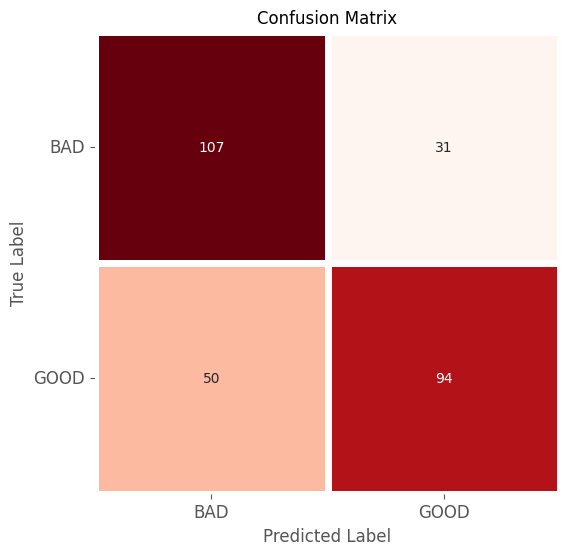

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=svm_y_pred)
redwine_cm = pd.DataFrame(columns=["BAD","GOOD"], 
                          index= ["BAD","GOOD"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(redwine_cm, annot=True,cmap="Reds", 
            fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

Future Predictions

In [22]:
# Future Predictions
# Select or create new data points for prediction
new_redwine = red_wine.sample(5)

# Extract features for prediction
new_data_X = new_redwine.drop('quality', axis=1)
new_data_y = new_redwine[['quality']]

# Make predictions using the trained SVM model
svm_y_pred_new = svm_model.predict(new_data_X.to_numpy())

# Map predicted labels to meaningful categories if necessary
svm_y_pred_mapped = np.where(svm_y_pred_new == 1, "GOOD", "BAD")

# Print the predicted quality labels
print("[All]Predicted quality of new red wine samples:", svm_y_pred_mapped)

# Print the actual quality labels for comparison
print("[All]Actual quality of new red wine samples:" , new_redwine['quality'].values)

[All]Predicted quality of new red wine samples: ['GOOD' 'GOOD' 'BAD' 'GOOD' 'GOOD']
[All]Actual quality of new red wine samples: [ 1  1 -1  1 -1]


Calculate the hinge loss for the future prediction

In [23]:
def new_hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred).mean()

# Calculate the hinge loss for the test data
new_hinge_loss = hinge_loss(new_data_y.to_numpy(), svm_y_pred_new)
print("Hinge Loss on data prediction:", new_hinge_loss)

Hinge Loss on data prediction: 0.88
